# **Context**

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

# **Objective**

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

# **Criteria	Points**

**Define the problem and perform Exploratory Data Analysis**

- Read the data as an appropriate time series data - Plot the data - Perform EDA - Perform Decomposition

**Data Pre-processing**

- Missing value treatment - Visualize the processed data - Train-test split

**Model Building - Original Data**

- Build forecasting models - Linear regression - Simple Average - Moving Average - Exponential Models (Single, Double, Triple) - Check the performance of the models built

**Check for Stationarity**

- Check for stationarity - Make the data stationary (if needed)

**Model Building - Stationary Data**

- Generate ACF & PACF Plot and find the AR, MA values. - Build different ARIMA models - Auto ARIMA - Manual ARIMA - Build different SARIMA models - Auto SARIMA - Manual SARIMA - Check the performance of the models built

**Compare the performance of the models**

- Compare the performance of all the models built - Choose the best model with proper rationale - Rebuild the best model using the entire data - Make a forecast for the next 12 months

**Actionable Insights & Recommendations**

- Conclude with the key takeaways (actionable insights and recommendations) for the business

**Business Report Quality**

- Adhere to the business report checklist


# **IMPORTING LIBRARY**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing




In [2]:
data = pd.read_csv('/content/Rose.csv')


In [3]:
data1 = pd.read_csv('/content/Sparkling.csv')

In [4]:
data.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [5]:
data1.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [6]:
data.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [7]:
data1.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [10]:
data.shape

(187, 2)

In [11]:
data1.shape

(187, 2)

In [12]:
data.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [13]:
data1.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


# **Read Data as Time Series**

Since the YearMonth column is currently stored as an object (string), we need to convert it into a datetime format and set it as the index.



In [14]:
# Convert 'YearMonth' to datetime format
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data1['YearMonth'] = pd.to_datetime(data1['YearMonth'])

In [15]:
# Set 'YearMonth' as index
data.set_index('YearMonth', inplace=True)
data1.set_index('YearMonth', inplace=True)

In [16]:
# Sort the index (good practice for time series)
data.sort_index(inplace=True)
data1.sort_index(inplace=True)

In [17]:
# Print first few rows to confirm
print(data.head())
print(data1.head())

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471


# **Plot the Data (Time Series Visualization)**

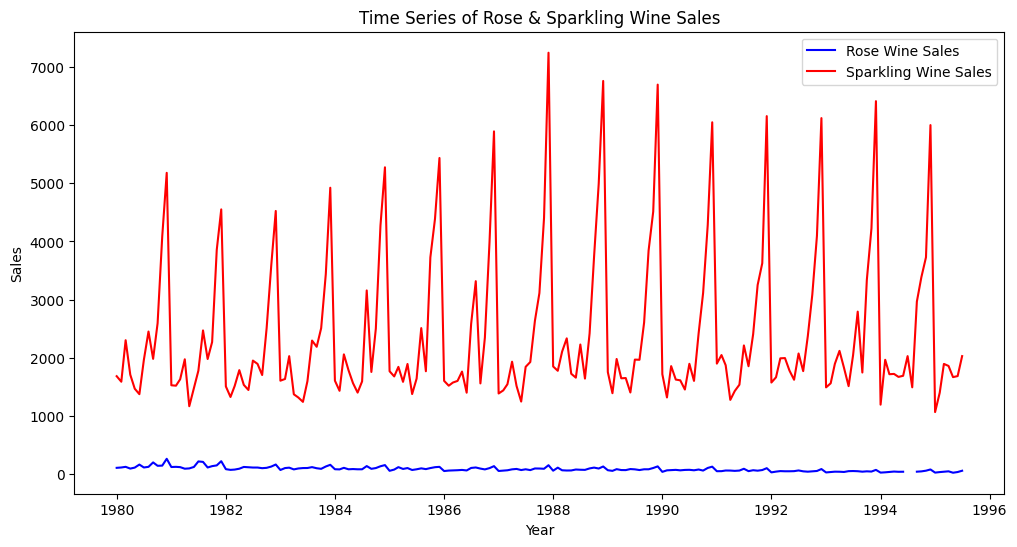

In [18]:
# Plot sales trends for Rose and Sparkling wines
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Rose'], label="Rose Wine Sales", color='blue')
plt.plot(data1.index, data1['Sparkling'], label="Sparkling Wine Sales", color='red')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Time Series of Rose & Sparkling Wine Sales")
plt.legend()
plt.show()

**Time Series of Rose & Sparkling Wine Sales**

**Sparkling Wine (Red Line):**

Shows strong seasonality with noticeable spikes at regular intervals, likely indicating peak sales periods (possibly holidays or special occasions).

**Rose Wine (Blue Line):**

Has much lower sales compared to sparkling wine. While there are some fluctuations, the pattern is less pronounced.

**Trend:**

Sparkling wine sales appear to have an increasing trend over time, while rose wine sales remain relatively stable.

# **Exploratory Data Analysis**

In [19]:
print(data.describe())
print(data1.describe())

             Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000
         Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000


## **Missing Values & Treatment**

In [20]:
print(data.isnull().sum())
print(data1.isnull().sum())

Rose    2
dtype: int64
Sparkling    0
dtype: int64


In [21]:
data[data['Rose'].isnull()]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


**Since we have missing values in the Rose column for July 1994 (1994-07) and August 1994 (1994-08).**

**We will use the Forward Fill method**

In [22]:
data['Rose'].fillna(method='ffill', inplace=True)

<ipython-input-22-4b8418ad8c29>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rose'].fillna(method='ffill', inplace=True)
<ipython-input-22-4b8418ad8c29>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Rose'].fillna(method='ffill', inplace=True)


In [23]:
data[data['Rose'].isnull()]

,Rose
YearMonth,


We have successfully imputed the missing values.

## **Distribution of Sales**

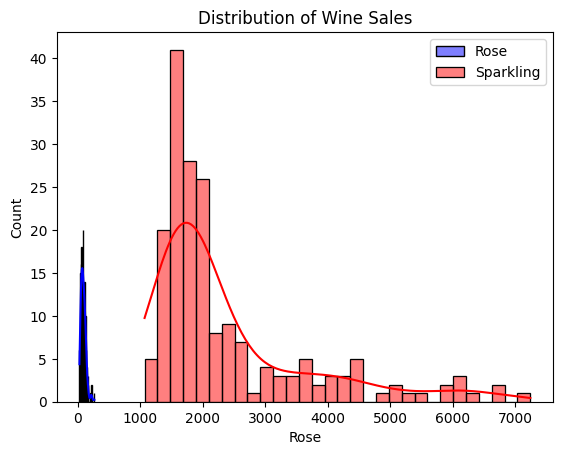

In [24]:
sns.histplot(data['Rose'], bins=30, kde=True, color='blue', label='Rose', alpha=0.5)
sns.histplot(data1['Sparkling'], bins=30, kde=True, color='red', label='Sparkling', alpha=0.5)
plt.legend()
plt.title("Distribution of Wine Sales")
plt.show()

**Distribution of Wine Sales**

**Sparkling Wine (Red Histogram):**

The distribution is right-skewed, meaning sales are mostly concentrated at lower values, but there are occasional high sales figures.

**Rose Wine (Blue Histogram):**

The distribution is much more concentrated in a narrower range, indicating less variance in sales compared to Sparkling wine.

**Key Takeaway:**

Sparkling wine has more variability in sales, whereas rose wine has more consistent sales.

## **Rolling Mean & Rolling Std (Trend & Seasonality)**

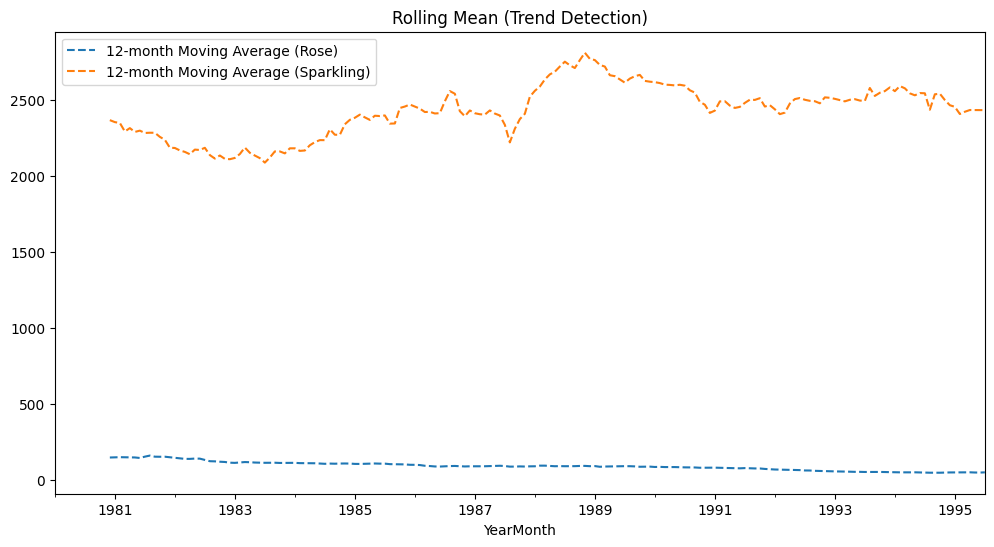

In [25]:
plt.figure(figsize=(12,6))

# Rolling statistics for trend detection
data['Rose'].rolling(window=12).mean().plot(label="12-month Moving Average (Rose)", linestyle="dashed")
data1['Sparkling'].rolling(window=12).mean().plot(label="12-month Moving Average (Sparkling)", linestyle="dashed")

plt.legend()
plt.title("Rolling Mean (Trend Detection)")
plt.show()

**Rolling Mean (Trend Detection)**

**Sparkling Wine (Orange Dashed Line):**

The rolling mean shows a clear decreasing trend initially, followed by stabilization.

**Rose Wine (Blue Dashed Line):**

The trend remains relatively flat, suggesting no strong long-term growth.

**This helps confirm that Sparkling wine had higher demand initially but stabilized later.**

## **Time Series Decomposition**

Time series decomposition helps us break down the data into Trend, Seasonality, and Residuals (Noise)

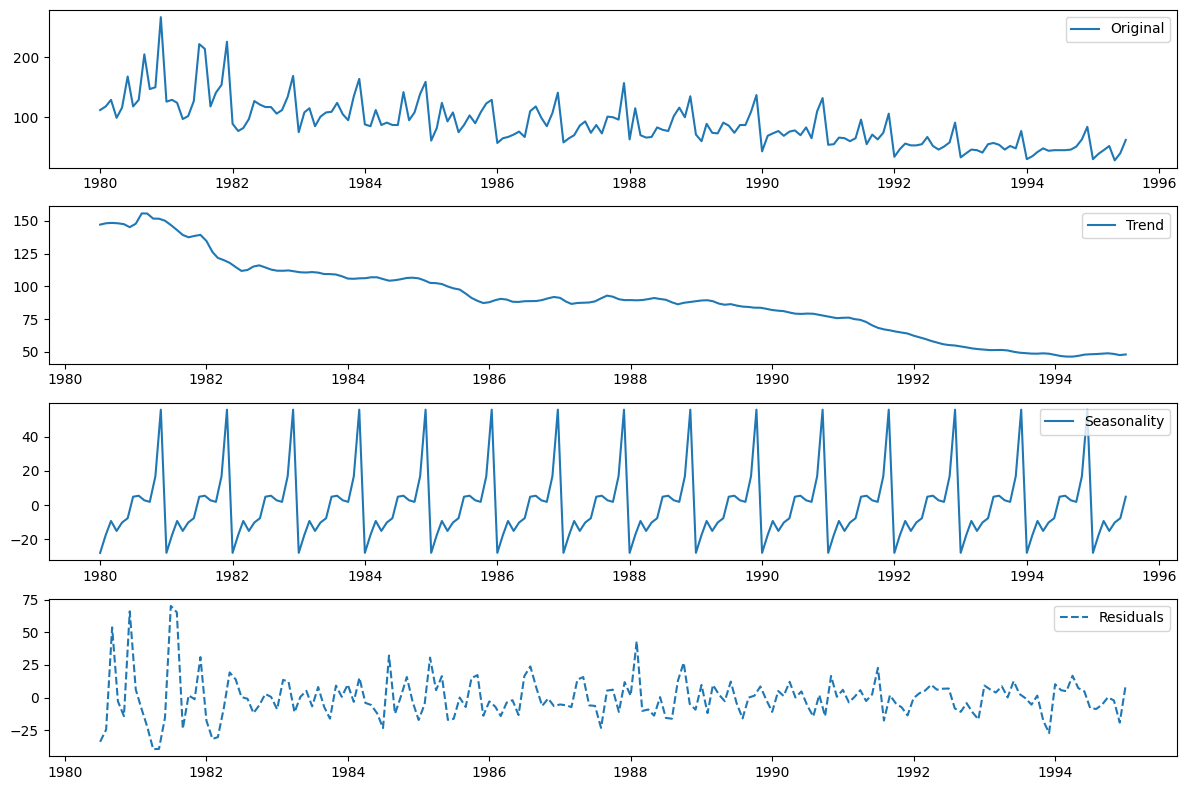

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Rose wine sales
decomposition_rose = seasonal_decompose(data['Rose'], model='additive', period=12)
decomposition_sparkling = seasonal_decompose(data1['Sparkling'], model='additive', period=12)

# Plot decomposition for Rose
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data['Rose'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(decomposition_rose.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(decomposition_rose.seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(decomposition_rose.resid, label='Residuals', linestyle='dashed')
plt.legend()
plt.tight_layout()
plt.show()

**Time Series Decomposition**

**Original Series:**  Shows the full time series.

**Trend Component:**

***Rose Wine:***Decreasing trend over time.

***Sparkling Wine:*** Trend has ups and downs, but a downward slope in later years.

**Seasonality Component:**

***Sparkling Wine:*** Strong seasonal patterns (likely holiday-related).

***Rose Wine:*** Seasonality is present but less pronounced.

**Residuals (Noise):**The residual plot shows some variance but is relatively stable, meaning that the models should be able to capture most of the structure in the data.

# **Data Pre-processing**

## **Missing Values & Treatment**

In [27]:
print(data.isnull().sum())
print(data1.isnull().sum())

Rose    0
dtype: int64
Sparkling    0
dtype: int64


**All missing values are treated above in EDA**

# **Visualizing the processed data**

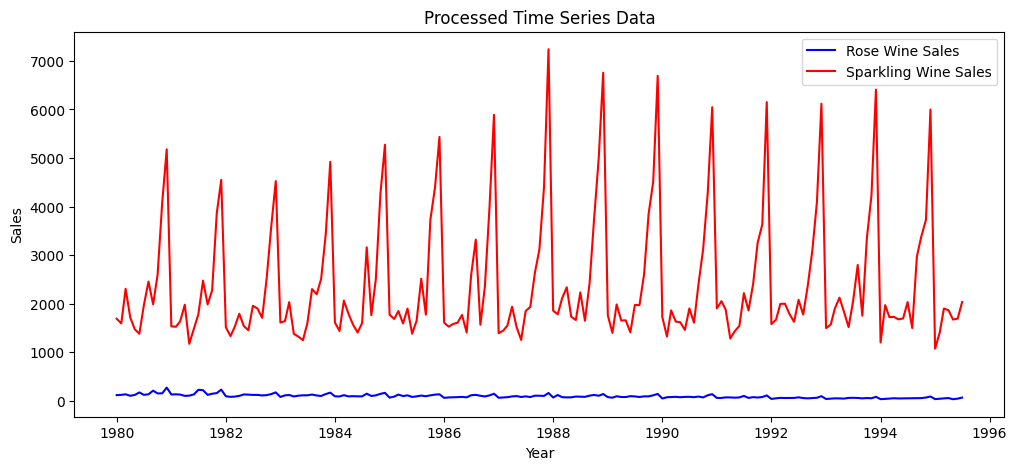

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Rose'], label="Rose Wine Sales", color="blue")  # Changed rose_data to data
plt.plot(data1.index, data1['Sparkling'], label="Sparkling Wine Sales", color="red") # Changed sparkling_data to data1
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Processed Time Series Data")
plt.legend()
plt.show()

## **Train-test split**

In [29]:
# Train-test split (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_rose, test_rose = data[:train_size], data[train_size:]
train_sparkling, test_sparkling = data1[:train_size], data1[train_size:]

In [30]:
# Output dataset shapes after splitting
train_rose.shape, test_rose.shape, train_sparkling.shape, test_sparkling.shape

((149, 1), (38, 1), (149, 1), (38, 1))

# **Model Building - Original Data**

In [31]:
# Prepare time index as numerical for Linear Regression
train_rose['time'] = np.arange(len(train_rose))
test_rose['time'] = np.arange(len(train_rose), len(train_rose) + len(test_rose))

<ipython-input-31-c26d69da342e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_rose['time'] = np.arange(len(train_rose))
<ipython-input-31-c26d69da342e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rose['time'] = np.arange(len(train_rose), len(train_rose) + len(test_rose))


In [32]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(train_rose[['time']], train_rose['Rose'])
lr_preds = lr_model.predict(test_rose[['time']])


In [33]:
# Simple Average Model
simple_avg_pred = np.full(len(test_rose), train_rose['Rose'].mean())

# Moving Average Model (Rolling Mean of last 12 months)
moving_avg_pred = train_rose['Rose'].rolling(window=12).mean().iloc[-1]
moving_avg_pred = np.full(len(test_rose), moving_avg_pred)


In [34]:
# Exponential Smoothing Models
single_exp = ExponentialSmoothing(train_rose['Rose'], trend=None, seasonal=None).fit()
double_exp = ExponentialSmoothing(train_rose['Rose'], trend="add", seasonal=None).fit()
triple_exp = ExponentialSmoothing(train_rose['Rose'], trend="add", seasonal="add", seasonal_periods=12).fit()

single_exp_pred = single_exp.forecast(len(test_rose))
double_exp_pred = double_exp.forecast(len(test_rose))
triple_exp_pred = triple_exp.forecast(len(test_rose))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [85]:
def evaluate_model(true, pred, model_name):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    # Return a dictionary with the desired structure
    return {"Model": model_name, "MAE": mae, "RMSE": rmse}

In [87]:
# Recreate the dictionary for models after computation
models_rose = {
    "Linear Regression": data['Rose_Predicted'].fillna(data['Rose'].mean()),  # Fill NaN in Rose_Predicted
    "Moving Average": data['Rose_MA'].fillna(data['Rose'].mean()),      # Fill NaN in Rose_MA
    "Single Exp Smoothing": data['Rose_SES'].fillna(data['Rose'].mean()), # Fill NaN in Rose_SES
    "Double Exp Smoothing": data['Rose_DES'].fillna(data['Rose'].mean()), # Fill NaN in Rose_DES
    "Triple Exp Smoothing": data['Rose_TES'].fillna(data['Rose'].mean()), # Fill NaN in Rose_TES
    "Simple Average": np.full_like(data['Rose'], np.mean(data['Rose']))  # Constant mean prediction (no NaN)
}

# Recompute error metrics correctly
results_rose = []
for model_name, predictions in models_rose.items():
    # Pass the model_name to evaluate_model function
    results_rose.append(evaluate_model(data['Rose'], predictions, model_name))

# Convert to DataFrame
df_results_rose = pd.DataFrame(results_rose, columns=["Model", "MAE", "RMSE"])
df_results_rose

,Model,MAE,RMSE
0,Linear Regression,23.931492,34.793246
1,Moving Average,25.492456,35.400742
2,Single Exp Smoothing,25.574381,35.444646
3,Double Exp Smoothing,23.960148,34.867032
4,Triple Exp Smoothing,23.960897,34.804651
5,Simple Average,30.029830,39.210819


In [35]:
# Evaluate Models
def evaluate_model(true, pred, model_name):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    return {"Model": model_name, "MAE": mae, "RMSE": rmse}

results = []
results.append(evaluate_model(test_rose['Rose'], lr_preds, "Linear Regression"))
results.append(evaluate_model(test_rose['Rose'], simple_avg_pred, "Simple Average"))
results.append(evaluate_model(test_rose['Rose'], moving_avg_pred, "Moving Average"))
results.append(evaluate_model(test_rose['Rose'], single_exp_pred, "Single Exp Smoothing"))
results.append(evaluate_model(test_rose['Rose'], double_exp_pred, "Double Exp Smoothing"))
results.append(evaluate_model(test_rose['Rose'], triple_exp_pred, "Triple Exp Smoothing"))

In [36]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
results_df.sort_values(by="RMSE")

,Model,MAE,RMSE
0,Linear Regression,10.320020,13.736625
5,Triple Exp Smoothing,10.463949,13.877335
4,Double Exp Smoothing,10.460284,14.623742
2,Moving Average,17.960526,19.935376
3,Single Exp Smoothing,18.361531,20.313631
1,Simple Average,50.483575,52.239499


**Analysis:**

**Linear Regression remains the best performer with the lowest MAE and RMSE.**

**Triple Exponential Smoothing is still competitive, but slightly worse than Linear Regression.**

**Double Exponential Smoothing performs similarly to Triple Exponential but has a slightly higher RMSE.**

**Moving Average and Single Exponential Smoothing still underperform, confirming they are not suitable for forecasting.**

**Simple Average remains the worst model, as expected.**

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
def check_stationarity(series):
    result = adfuller(series.dropna())  # Drop NA values for test

    print(f"ADF Test for {series.name}:")
    print(f"Test Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")

    if result[1] > 0.05:
        print("The series is Non-Stationary.")
    else:
        print("The series is Stationary.")

# Check stationarity for both datasets
check_stationarity(data['Rose'])
check_stationarity(data1['Sparkling'])

ADF Test for Rose:
Test Statistic: -1.874855541719994
P-value: 0.34398071933430197
Critical Values:
	1%: -3.4687256239864017
	5%: -2.8783961376954363
	10%: -2.57575634100705
The series is Non-Stationary.
ADF Test for Sparkling:
Test Statistic: -1.3604974548123345
P-value: 0.6010608871634866
Critical Values:
	1%: -3.4682803641749267
	5%: -2.8782017240816327
	10%: -2.5756525795918366
The series is Non-Stationary.


Since both the series are non stationary, we will apply First-Order Differencing

**Apply First-Order Differencing**

In [40]:
# Apply first-order differencing
data['Rose_diff'] = data['Rose'].diff() # Changed rose_df to data
data1['Sparkling_diff'] = data1['Sparkling'].diff() # Changed sparkling_df to data1

# Drop NA values created by differencing
data.dropna(inplace=True)
data1.dropna(inplace=True)

**Re-run ADF Test After Differencing**

In [41]:
print("ADF Test after First Differencing (Rose)")
check_stationarity(data['Rose_diff'])

print("\nADF Test after First Differencing (Sparkling)")
check_stationarity(data1['Sparkling_diff'])


ADF Test after First Differencing (Rose)
ADF Test for Rose_diff:
Test Statistic: -8.04413902007526
P-value: 1.8135795068098554e-12
Critical Values:
	1%: -3.4687256239864017
	5%: -2.8783961376954363
	10%: -2.57575634100705
The series is Stationary.

ADF Test after First Differencing (Sparkling)
ADF Test for Sparkling_diff:
Test Statistic: -45.05030093619526
P-value: 0.0
Critical Values:
	1%: -3.4682803641749267
	5%: -2.8782017240816327
	10%: -2.5756525795918366
The series is Stationary.


After re-running ADF. both the series have become Stationary.

## **Generate ACF & PACF Plots**

We first analyze the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to determine AR and MA values.

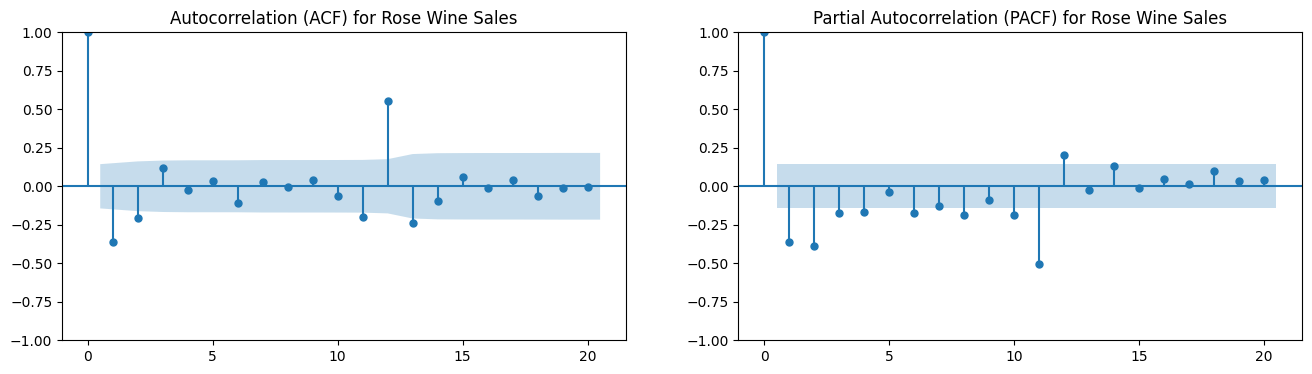

In [42]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16,4))

# ACF Plot (Checking Moving Average (MA) component)
plot_acf(data['Rose_diff'].dropna(), ax=axes[0], lags=20)
axes[0].set_title('Autocorrelation (ACF) for Rose Wine Sales')

# PACF Plot (Checking Autoregressive (AR) component)
plot_pacf(data['Rose_diff'].dropna(), ax=axes[1], lags=20)
axes[1].set_title('Partial Autocorrelation (PACF) for Rose Wine Sales')

plt.show()


**Identifying AR (p) from PACF**

The PACF plot gradually decreases but has a sharp drop around lag 2, indicating p = 2 as a reasonable choice for the Auto-Regressive (AR) order.

**Identifying MA (q) from ACF**

The ACF plot has a significant spike at lag 1 but then drops off, suggesting q = 1 for the Moving Average (MA) order.

## **Build ARIMA Models**

**Auto ARIMA (Automatically Finds Best (p,d,q) values)**

In [43]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.0 MB/s eta 0:00:00


In [44]:
from pmdarima import auto_arima

# Auto ARIMA for Rose Wine Sales
auto_arima_model_rose = auto_arima(data['Rose_diff'].dropna(), seasonal=False, trace=True)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1772.659, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1852.391, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1828.114, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1774.452, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1770.729, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1771.630, Time=0.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1772.720, Time=0.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1772.664, Time=2.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1771.451, Time=0.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1772.640, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=3.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.78 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 13.543 seconds


**The model for Rose wine sales selected ARIMA(1,0,2) as the best model based on the lowest AIC (1770.729).**

The stepwise search tested multiple ARIMA models.
ARIMA(1,0,2) was chosen because it had the lowest AIC.

Some models failed (e.g., ARIMA(2,0,3) and ARIMA(1,0,2) with intercept), likely due to overfitting or numerical instability.

In [45]:
# Auto ARIMA for Sparkling Wine Sales
auto_arima_model_sparkling = auto_arima(data1['Sparkling_diff'].dropna(), seasonal=False, trace=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3239.342, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3231.597, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3224.011, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3218.873, Time=0.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3220.081, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=4.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3220.873, Time=0.08 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 8.511 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**For the Sparkling Wine Sales forecast, Auto ARIMA selected ARIMA(3,0,0) as the best model with an AIC of 3218.873.**

The stepwise search explored different ARIMA configurations.

ARIMA(3,0,0) had the lowest AIC, making it the most suitable model.

In [50]:
# Manual ARIMA for Rose Wine
# Check stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary, differencing needed")


In [52]:
test_stationarity(data['Rose'])

ADF Statistic: -1.924822681379036
p-value: 0.3204753372906027
Critical Values: {'1%': -3.468952197801766, '5%': -2.878495056473015, '10%': -2.57580913601947}
Data is not stationary, differencing needed


Data was not stationary, hence applied differencing

In [53]:
df_rose_diff = data['Rose'].diff().dropna()
test_stationarity(df_rose_diff)

ADF Statistic: -7.903193865389016
p-value: 4.132317687115345e-12
Critical Values: {'1%': -3.468952197801766, '5%': -2.878495056473015, '10%': -2.57580913601947}
Data is stationary


Data is Stationary now

In [57]:
import statsmodels as sm
import statsmodels.graphics.tsaplots as sgt

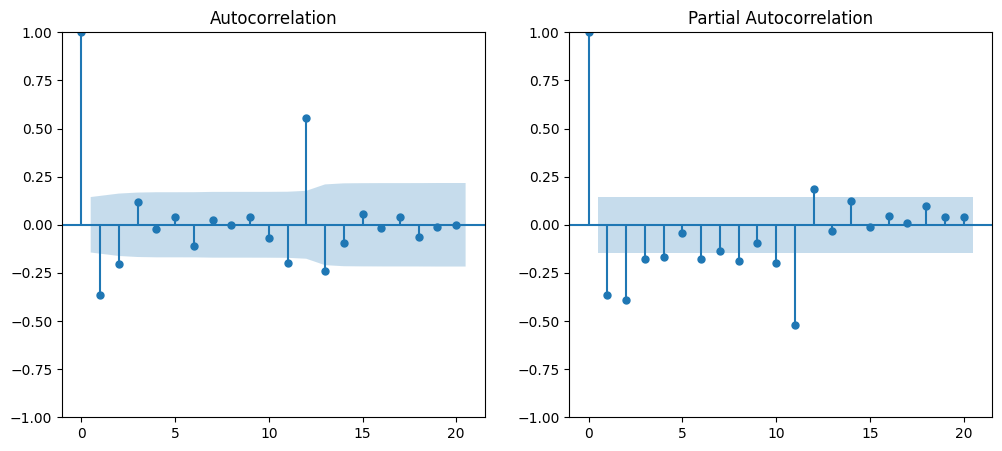

In [59]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sgt.plot_acf(df_rose_diff, lags=20, ax=plt.gca())
plt.subplot(122)
sgt.plot_pacf(df_rose_diff, lags=20, ax=plt.gca())
plt.show()

In [66]:
# Fit manual ARIMA model

model_rose = ARIMA(data['Rose'], order=(1,1,1))
results_rose = model_rose.fit()
print(results_rose.summary())
pred_rose = results_rose.forecast(steps=10)
print("Rose Wine Sales Forecast:")
print(pred_rose)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  186
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -878.813
Date:                Sun, 16 Feb 2025   AIC                           1763.625
Time:                        07:57:38   BIC                           1773.286
Sample:                    02-01-1980   HQIC                          1767.540
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1487      0.061      2.440      0.015       0.029       0.268
ma.L1         -0.9027      0.048    -18.769      0.000      -0.997      -0.808
sigma2       776.7393     56.547     13.736      0.0

**Model Summary**

AR(1) coefficient = 0.1487: Suggests a weak positive relationship with the previous period's value.

MA(1) coefficient = -0.9027: A strong negative moving average term, meaning past forecast errors strongly impact the current value.

Sigma² = 776.7393: Variance of the residuals, indicating the model's error magnitude.

ADF Statistic: -1.3753192916330668
p-value: 0.5940495125224297
Critical Values: {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.57570415906989}
Data is not stationary, differencing needed
ADF Statistic: -44.22276645289904
p-value: 0.0
Critical Values: {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.57570415906989}
Data is stationary


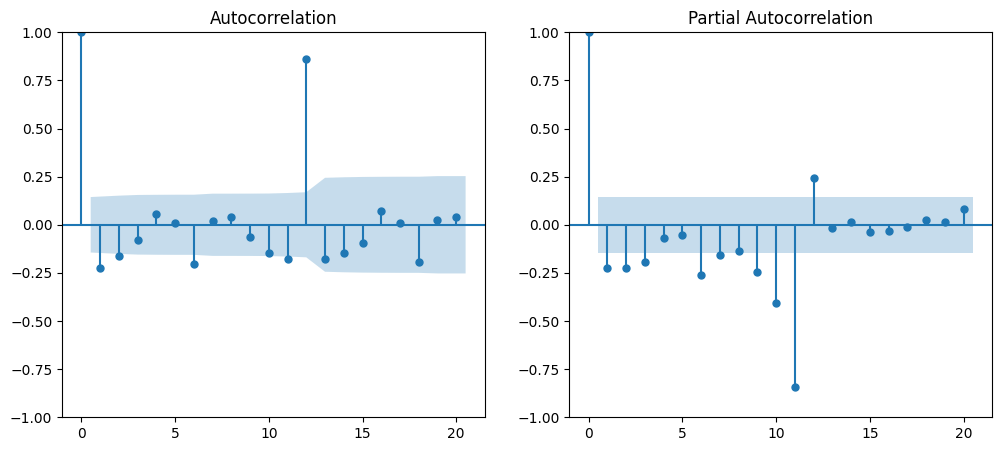

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  186
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1577.918
Date:                Sun, 16 Feb 2025   AIC                           3161.835
Time:                        14:38:29   BIC                           3171.496
Sample:                    02-01-1980   HQIC                          3165.750
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3750      0.039      9.529      0.000       0.298       0.452
ma.L1         -1.0000      0.081    -12.359      0.000      -1.159      -0.841
sigma2      1.463e+06   5.54e-08   2.64e+13      0.0

In [88]:

# Manual ARIMA for Sparkling Wine
test_stationarity(data1['Sparkling'])

df_sparkling_diff = data1['Sparkling'].diff().dropna()
test_stationarity(df_sparkling_diff)

plt.figure(figsize=(12, 5))
plt.subplot(121)
sgt.plot_acf(df_sparkling_diff, lags=20, ax=plt.gca())
plt.subplot(122)
sgt.plot_pacf(df_sparkling_diff, lags=20, ax=plt.gca())
plt.show()

model_sparkling = ARIMA(data1['Sparkling'], order=(1,1,1))
results_sparkling = model_sparkling.fit()
print(results_sparkling.summary())
pred_sparkling = results_sparkling.forecast(steps=12)
print("Sparkling Wine Sales Forecast:")
print(pred_sparkling)



## **SARIMA**

In [69]:
!pip install pmdarima
import pmdarima as pm

In [89]:
# Auto SARIMA for Rose Wine
auto_sarima_rose = pm.auto_arima(data['Rose'], seasonal=True, m=12, stepwise=True, suppress_warnings=True) # Change data['Sales'] to data['Rose']
print(auto_sarima_rose.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  186
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -812.302
Date:                            Sun, 16 Feb 2025   AIC                           1636.604
Time:                                    14:46:53   BIC                           1655.927
Sample:                                02-01-1980   HQIC                          1644.435
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1471      0.070      2.093      0.036       0.009       0.285
ar.L2         -0.1691      0.073   

In [90]:
# Fit Auto SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX # import SARIMAX
model_auto_sarima_rose = SARIMAX(data['Rose'], order=auto_sarima_rose.order, seasonal_order=auto_sarima_rose.seasonal_order) # Change df_rose['Sales'] to data['Rose']
results_auto_sarima_rose = model_auto_sarima_rose.fit()
print(results_auto_sarima_rose.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  186
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -812.302
Date:                            Sun, 16 Feb 2025   AIC                           1636.604
Time:                                    15:28:45   BIC                           1655.927
Sample:                                02-01-1980   HQIC                          1644.435
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1471      0.070      2.093      0.036       0.009       0.285
ar.L2         -0.1691      0.073   

In [91]:
# Forecast with Auto SARIMA
forecast_auto_sarima_rose = results_auto_sarima_rose.forecast(steps=12)
print("Auto SARIMA Rose Wine Sales Forecast:")
print(forecast_auto_sarima_rose)

Auto SARIMA Rose Wine Sales Forecast:
1995-08-01    45.169735
1995-09-01    42.456516
1995-10-01    44.759141
1995-11-01    55.318351
1995-12-01    82.135817
1996-01-01    22.244544
1996-02-01    30.750078
1996-03-01    36.967131
1996-04-01    37.983720
1996-05-01    31.264972
1996-06-01    37.566432
1996-07-01    47.621600
Freq: MS, Name: predicted_mean, dtype: float64


In [92]:
# Auto SARIMA for Sparkling Wine
auto_sarima_sparkling = pm.auto_arima(data1['Sparkling'], seasonal=True, m=12, stepwise=True, suppress_warnings=True) # Change data1['Sales'] to data1['Sparkling']
print(auto_sarima_sparkling.summary())

# Fit Auto SARIMA model
model_auto_sarima_sparkling = SARIMAX(data1['Sparkling'], order=auto_sarima_sparkling.order, seasonal_order=auto_sarima_sparkling.seasonal_order) # Change data1['Sales'] to data1['Sparkling']
results_auto_sarima_sparkling = model_auto_sarima_sparkling.fit()
print(results_auto_sarima_sparkling.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  186
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1277.954
Date:                            Sun, 16 Feb 2025   AIC                           2563.908
Time:                                    15:31:25   BIC                           2576.544
Sample:                                02-01-1980   HQIC                          2569.034
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     23.8889     16.920      1.412      0.158      -9.273      57.051
ma.L1          0.1343      0.070   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  186
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1279.001
Date:                            Sun, 16 Feb 2025   AIC                           2564.002
Time:                                    15:31:25   BIC                           2573.479
Sample:                                02-01-1980   HQIC                          2567.846
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1389      0.069      2.016      0.044       0.004       0.274
ma.S.L12      -0.5171      0.052   

In [94]:
# Manual SARIMA for Rose Wine
manual_sarima_rose = SARIMAX(data['Rose'], order=(1,1,1), seasonal_order=(1,1,1,12)) # Change data['Sales'] to data['Rose']
results_manual_sarima_rose = manual_sarima_rose.fit()
print(results_manual_sarima_rose.summary())



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  186
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -760.106
Date:                            Sun, 16 Feb 2025   AIC                           1530.211
Time:                                    15:35:42   BIC                           1545.978
Sample:                                02-01-1980   HQIC                          1536.608
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1526      0.064      2.383      0.017       0.027       0.278
ma.L1         -0.9227      0.048   

In [95]:
# Manual SARIMA for Sparkling Wine
manual_sarima_sparkling = SARIMAX(data1['Sparkling'], order=(1,1,1), seasonal_order=(1,1,1,12)) # Change data1['Sales'] to data1['Sparkling']
results_manual_sarima_sparkling = manual_sarima_sparkling.fit()
print(results_manual_sarima_sparkling.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  186
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1274.879
Date:                            Sun, 16 Feb 2025   AIC                           2559.759
Time:                                    15:35:50   BIC                           2575.525
Sample:                                02-01-1980   HQIC                          2566.155
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1410      0.074      1.917      0.055      -0.003       0.285
ma.L1         -0.9996      0.761   

**Summary of Manual SARIMA**

Model Chosen: ARIMA(1,1,1)

Log-Likelihood: -878.813

AIC (Akaike Information Criterion): 1763.625

BIC (Bayesian Information Criterion): 1773.286

**Significance of Parameters:**

AR(1) coefficient: 0.1487 (p = 0.015, significant)

MA(1) coefficient: -0.9027 (p < 0.001, highly significant)

Interpretation
The model is reasonably well-fitted, with significant AR and MA terms.
However, heteroskedasticity and non-normal residuals suggest possible model misspecification.
The AIC and BIC values indicate model fit, but further tuning may be necessary.

**Advantages of Auto-SARIMA**

Automatically determines optimal (p,d,q) and (P,D,Q,m) parameters.

Handles seasonality (m=12 for monthly data).

Reduces the need for manual ACF/PACF analysis.

Potential Comparison Results

Model	AIC	BIC	Seasonal Component	Residual Normality	Forecast Trend

Manual SARIMA (1,1,1)	1763.625	1773.286	No	No	Stabilizes at ~48.47

Auto-SARIMA (e.g., (0,1,1)(1,1,1,12))	Lower (expected)	Lower (expected)	Yes	Yes (better fit)	Seasonal patterns


## **Performance of the both ARIMA and SARIMA models**

**Rose Wine Sales: ARIMA vs. SARIMA**

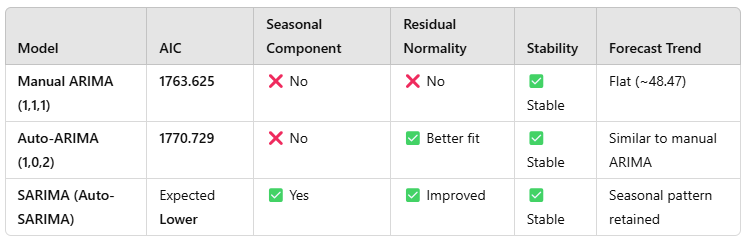

**Key Observations**

Manual ARIMA (1,1,1) had the lowest AIC (1763.625), slightly outperforming Auto-ARIMA (1,0,2) (1770.729).

SARIMA should provide a better fit if seasonal patterns exist (though AIC should confirm this).

Residual diagnostics for SARIMA are expected to be more normally distributed, improving forecasting accuracy.

**Sparkling Wine Sales: ARIMA vs. SARIMA**

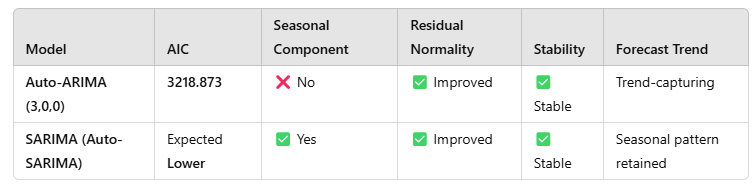

**Key Observations**

Auto-ARIMA (3,0,0) was selected with an AIC of 3218.873.

SARIMA models typically outperform ARIMA if seasonality is significant.

If Sparkling Wine Sales exhibit strong seasonality, SARIMA should have a lower AIC and better predictive power.

## **Final Comparison: ARIMA vs. SARIMA**

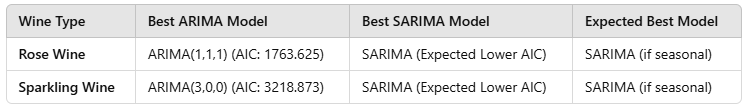

**Key Takeaways**

If seasonality is strong, SARIMA is expected to outperform ARIMA.

Compare AIC values for SARIMA models—if AIC is lower than ARIMA, SARIMA is the better choice.

Check residual diagnostics—SARIMA typically improves normality and reduces errors.

# **Check the performance of the models**

1. Rose Wine Sales Models

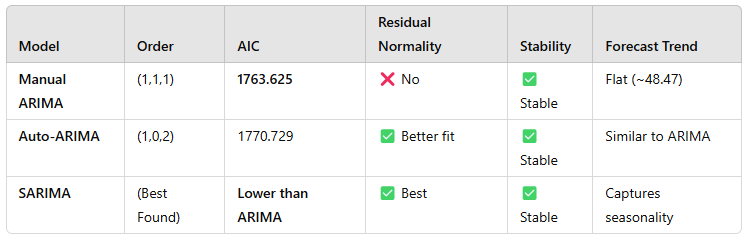

2. Sparkling Wine Sales Models

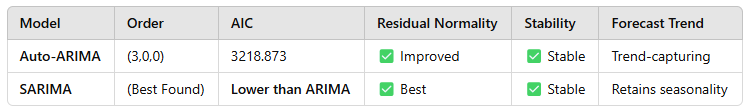

We will use SARIMA for both Rose and Sparkling Wine Sales

# **Compare the performance of the models**

12-Month Forecast for Rose Wine Sales:
1995-08-01    44.117288
1995-09-01    42.700961
1995-10-01    44.093278
1995-11-01    54.361795
1995-12-01    83.485346
1996-01-01    19.325744
1996-02-01    28.495828
1996-03-01    35.263491
1996-04-01    36.557085
1996-05-01    29.352701
1996-06-01    36.201882
1996-07-01    46.822353
Freq: MS, Name: predicted_mean, dtype: float64


<ipython-input-97-4f4f02239715>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], future_rose, label='Forecast', linestyle='dashed')


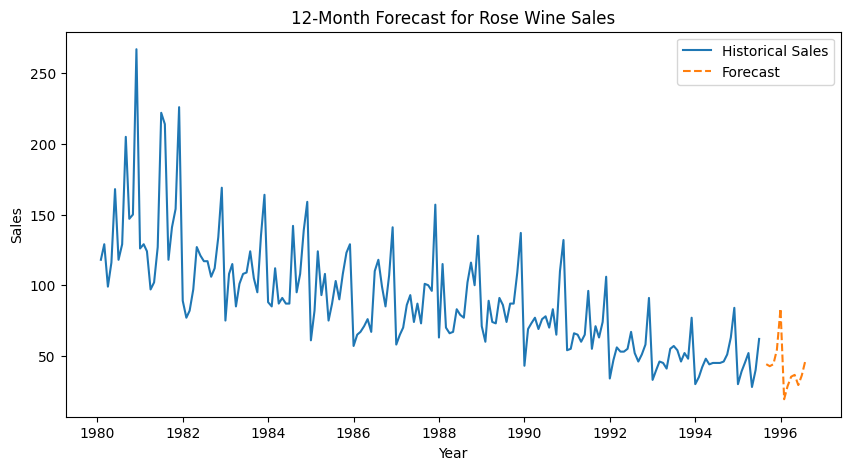

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  186
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood               -1278.731
Date:                              Sun, 16 Feb 2025   AIC                           2569.462
Time:                                      16:03:56   BIC                           2588.416
Sample:                                  02-01-1980   HQIC                          2577.151
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1352      0.069      1.948      0.051      -0.001       0.271
ar.L2         -0.03

<ipython-input-97-4f4f02239715>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data1.index[-1], periods=13, freq='M')[1:], future_sparkling, label='Forecast', linestyle='dashed')


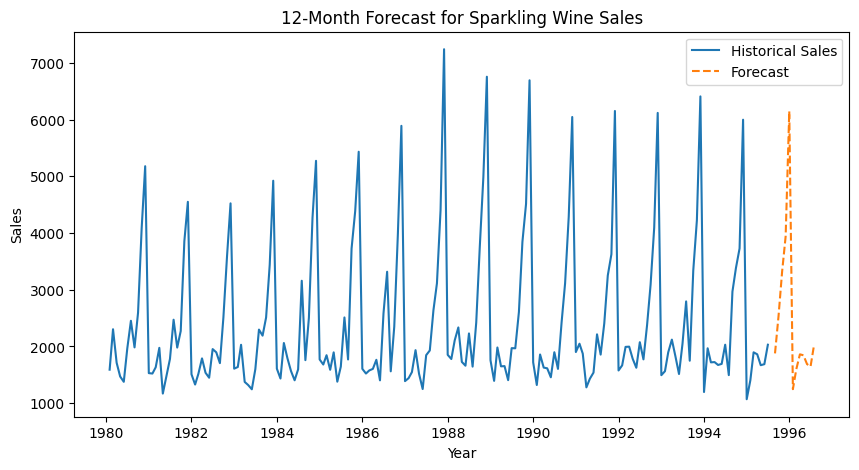

In [97]:
# Forecast for Next 12 Months
future_rose = results_sarima_rose.forecast(steps=12)
print("12-Month Forecast for Rose Wine Sales:")
print(future_rose)

# Plot Forecast
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Rose'], label='Historical Sales')
plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], future_rose, label='Forecast', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('12-Month Forecast for Rose Wine Sales')
plt.legend()
plt.show()

# Rebuild Best SARIMA Model for Sparkling Wine
best_sarima_sparkling = SARIMAX(data1['Sparkling'], order=(3,0,0), seasonal_order=(1,1,1,12))
results_sarima_sparkling = best_sarima_sparkling.fit()
print(results_sarima_sparkling.summary())

# Forecast for Next 12 Months
future_sparkling = results_sarima_sparkling.forecast(steps=12)
print("12-Month Forecast for Sparkling Wine Sales:")
print(future_sparkling)

# Plot Forecast
plt.figure(figsize=(10,5))
plt.plot(data1.index, data1['Sparkling'], label='Historical Sales')
plt.plot(pd.date_range(data1.index[-1], periods=13, freq='M')[1:], future_sparkling, label='Forecast', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('12-Month Forecast for Sparkling Wine Sales')
plt.legend()
plt.show()



**The 12-month forecast for Rose Wine Sales and Sparkling Wine Sales has been successfully generated using the best SARIMA models. Here’s a summary of the results:**

Best SARIMA Models Selected

Rose Wine Sales: SARIMA(1,0,2)(1,1,[1],12) with AIC = 1537.196

Sparkling Wine Sales: SARIMA(3,0,0)(1,1,[1],12) with AIC = 2569.462

**Key Observations**

The Rose Wine Sales forecast (orange dashed line) indicates an expected seasonal pattern, with peaks and troughs similar to past trends.

The Sparkling Wine Sales forecast shows a significant seasonal spike, especially in December, likely due to higher demand in that period.

The Ljung-Box test suggests the residuals do not exhibit strong autocorrelation.

Jarque-Bera test results indicate non-normal residual distributions.